# APO SYSTEM 

## Getting an figure of 3D APO state 

In [ ]:
import os
import pymol
from pymol import cmd

# Launch PyMOL quietly
pymol.finish_launching(['pymol', '-qc'])

# Define the path and filename
path = r"/home/jpramosg/Desktop/MD/dengue/data/APO/results_analysis/"
f_name = r"RMSF_NS3_r1.pdb"

os.chdir("/home/jpramosg/Desktop/MD/dengue/plots/") 

# Load the protein structure
cmd.load(path + f_name, 'my_protein')

# Set the background color to white
cmd.bg_color('white')

# Display the protein as a surface
cmd.show_as('surface', 'my_protein')

# Quality of surface 
cmd.set("surface_quality", 2)

# size of surface in the protein 
cmd.set("solvent_radius", 3.0)

# Color the protein spectrum
cmd.spectrum('b', 'red_white_blue', 'my_protein', minimum=0, maximum=5.5)

# Set the orthoscopic view for better quality
cmd.set('orthoscopic', 1)

# Increase anti-aliasing to reduce jagged edges
cmd.set('antialias', 2)  # 2 is higher quality

# Set depth cue to off to avoid perspective effects
cmd.set('depth_cue', 0)

# Adjust lighting to minimize unwanted shadows
cmd.set('light_count', 3)  # Keep a minimal lighting setup
cmd.set('ray_trace_mode', 0)  # Standard ray tracing without shadow effects

# Set the view matrix to the specified coordinates
cmd.set_view((
     0.228031665,   -0.169037268,    0.958868146,
    -0.798686981,    0.530775249,    0.283509701,
    -0.556867540,   -0.830485106,   -0.013977118,
     0.000000000,    0.000000000, -181.238967896,
    -4.642189026,   13.359375000,    4.743450165,
   152.869308472,  209.608627319,   20.000000000 
))

cmd.zoom(animate=-1, complete=1)
# Save the image with high resolution and no padding
cmd.png('NS3_RMSF.png', width=3000, height=3000, dpi=300, ray=1)

# Optional: Make sure the image fits well before saving
#cmd.zoom('my_protein', buffer=2.0)  # Adjust the zoom level if needed

## create bar plot 

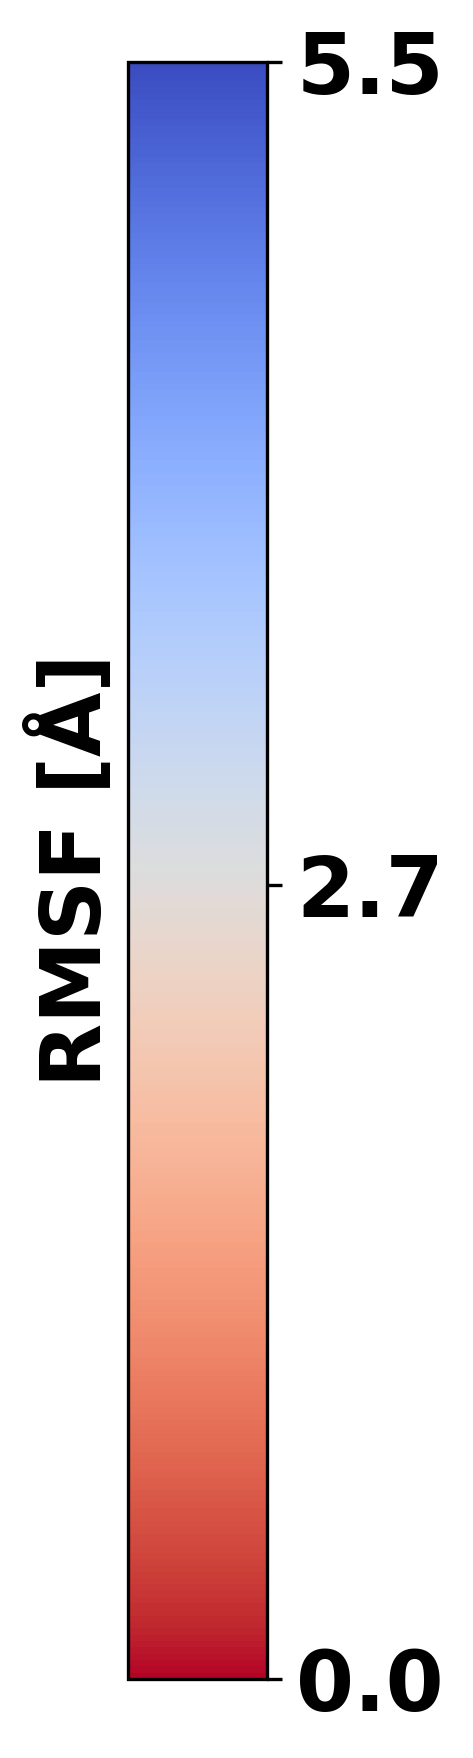

In [5]:
import os 
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image, display

os.chdir("/home/jpramosg/Desktop/MD/dengue/plots/") 

# Define min and max values and ticks
min_value = 0.0
max_value = 5.5
ticks = [0.0, 2.7, 5.5]
legend = "RMSF [Å]"

# Create a figure and axis for the color bar
fig, ax = plt.subplots(figsize=(0.6, 7.0))  # Increased width for more space

# Create a dummy scalar mappable object to use for the color bar with reversed colormap
sm = plt.cm.ScalarMappable(cmap='coolwarm_r', norm=plt.Normalize(vmin=min_value, vmax=max_value))
sm.set_array([])

# Create the color bar using the blank axis
cbar = plt.colorbar(sm, cax=ax, orientation='vertical')
cbar.set_ticks(ticks)

# Set bold tick labels
tick_labels = [f"{tick:.1f}" for tick in ticks]
cbar.ax.set_yticklabels(tick_labels, fontsize=20, fontweight='bold')

# Remove the color bar label
# cbar.set_label('')  # Clear the label

# Adjust the width of the color bar
# ax.set_xlim(0, 1.1)  # Adjust the x-limits to fit the color bar and text

# Get the color bar's height in data units
cbar_height_data = cbar.ax.get_ylim()[1] - cbar.ax.get_ylim()[0]

# Center text vertically within the color bar height
legend_y = (cbar_height_data / 2) + cbar.ax.get_ylim()[0]

# Add the legend text to the left of the color bar, centered vertically
ax.text(-0.7, legend_y, legend, ha='left', va='center', fontsize=20, fontweight='bold', rotation=90, color='black', bbox=dict(facecolor='white', edgecolor='none', pad=2))

# Save the color bar image
plt.savefig('NS3_RMSF_bar.png', bbox_inches='tight', pad_inches=0.1, dpi=300)

# Close the figure
plt.close(fig)

# Display the image in the notebook
display(Image(filename='NS3_RMSF_bar.png'))



## joint the pictures 

In [2]:
import os 
from PIL import Image

os.chdir("/home/jpramosg/Desktop/MD/dengue/plots/")  

# Load images
protein_img = Image.open('NS3_RMSF.png')
color_bar_img = Image.open('NS3_RMSF_bar.png')

# Resize the color bar image to be shorter in length and wider
# Shortening the color bar (reduce height)
new_color_bar_height = int(protein_img.height * 0.65)  # Further reduce the height of the color bar
# Widening the color bar (increase width)
new_color_bar_width = int(color_bar_img.width * 0.9)  # Increase the width of the color bar
new_color_bar_img = color_bar_img.resize((new_color_bar_width, new_color_bar_height), Image.LANCZOS)

# Create a new image with white background
combined_img_width = new_color_bar_img.width + protein_img.width
combined_img_height = max(protein_img.height, new_color_bar_img.height)
combined_img = Image.new('RGB', (combined_img_width, combined_img_height), (255, 255, 255))

# Paste the protein image into the combined image
protein_img_position_x = new_color_bar_img.width
protein_img_position_y = 0
combined_img.paste(protein_img, (protein_img_position_x, protein_img_position_y))

# Adjust color bar position to move it slightly to the left
color_bar_position_x = 200  # Move the color bar 10 pixels to the left
color_bar_position_y = (combined_img_height - new_color_bar_img.height) // 2
combined_img.paste(new_color_bar_img, (color_bar_position_x, color_bar_position_y), new_color_bar_img)  # Use the color_bar_img as mask to ensure transparency

# Save the combined image
combined_img.save('NS3_final_RMSF.png')

# Display the combined image (optional)
combined_img.show()



# HOLO SYSTEM 

In [1]:
import os
import pymol
from pymol import cmd

# Launch PyMOL quietly
pymol.finish_launching(['pymol', '-qc'])

# Define the path and filename
path = r"/home/jpramosg/Desktop/MD/dengue/data/HOLO/results_analysis/"
f_name = r"RMSFHo_NS3_r2.pdb"

os.chdir("/home/jpramosg/Desktop/MD/dengue/plots/") 

# Load the protein structure
cmd.load(path + f_name, 'my_protein')

# Set the background color to white
cmd.bg_color('white')

# Display the protein as a surface
cmd.show_as('surface', 'my_protein')

# Quality of surface 
cmd.set("surface_quality", 2)

# size of surface in the protein 
cmd.set("solvent_radius", 3.0)

# Color the protein spectrum
cmd.spectrum('b', 'red_white_blue', 'my_protein', minimum=0, maximum=5.5)

# Set the orthoscopic view for better quality
cmd.set('orthoscopic', 1)

# Increase anti-aliasing to reduce jagged edges
cmd.set('antialias', 2)  # 2 is higher quality

# Set depth cue to off to avoid perspective effects
cmd.set('depth_cue', 0)

# Adjust lighting to minimize unwanted shadows
cmd.set('light_count', 3.1)  # Keep a minimal lighting setup
cmd.set('ray_trace_mode', 0)  # Standard ray tracing without shadow effects

# Set the view matrix to the specified coordinates

cmd.set_view((
      -0.983788311,    0.138524026,   -0.113878727,
    -0.135104194,   -0.154982626,    0.978633165,
     0.117915943,    0.978154540,    0.171186656,
     0.000000000,    0.000000000, -181.955413818,
    32.985153198,    8.841115952,  -21.604560852,
   153.185897827,  210.724929810,  -20.000000000
))

# Save the image with high resolution and no padding
cmd.zoom(animate=-1, complete=1) # Adjust the zoom level if needed

cmd.png('NS3Ho_RMSF.png', width=3000, height=3000, dpi=300, ray=1)

# Optional: Make sure the image fits well before saving
#cmd.zoom('my_protein', buffer=2.0) 
#cmd.zoom(animate=-1, complete=1) # Adjust the zoom level if needed


1

In [2]:
import os 
from PIL import Image

os.chdir("/home/jpramosg/Desktop/MD/dengue/plots/")  

# Load images
protein_img = Image.open('NS3Ho_RMSF.png')
color_bar_img = Image.open('NS3_RMSF_bar.png')

# Resize the color bar image to be shorter in length and wider
# Shortening the color bar (reduce height)
new_color_bar_height = int(protein_img.height * 0.65)  # Further reduce the height of the color bar
# Widening the color bar (increase width)
new_color_bar_width = int(color_bar_img.width * 0.9)  # Increase the width of the color bar
new_color_bar_img = color_bar_img.resize((new_color_bar_width, new_color_bar_height), Image.LANCZOS)

# Create a new image with white background
combined_img_width = new_color_bar_img.width + protein_img.width
combined_img_height = max(protein_img.height, new_color_bar_img.height)
combined_img = Image.new('RGB', (combined_img_width, combined_img_height), (255, 255, 255))

# Paste the protein image into the combined image
protein_img_position_x = new_color_bar_img.width
protein_img_position_y = 0
combined_img.paste(protein_img, (protein_img_position_x, protein_img_position_y))

# Adjust color bar position to move it slightly to the left
color_bar_position_x = 200  # Move the color bar 10 pixels to the left
color_bar_position_y = (combined_img_height - new_color_bar_img.height) // 2
combined_img.paste(new_color_bar_img, (color_bar_position_x, color_bar_position_y), new_color_bar_img)  # Use the color_bar_img as mask to ensure transparency

# Save the combined image
combined_img.save('NS3Ho_final_RMSF.png')

# Display the combined image (optional)
combined_img.show()
